<a href="https://colab.research.google.com/github/JManuelRG/simuladores/blob/main/Vmolar_Pr%C3%A1ctica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Volúmenes Molares Parciales

# Ajuste polinomial de Lagrange

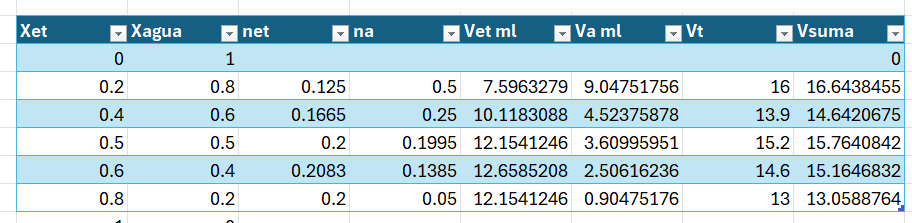

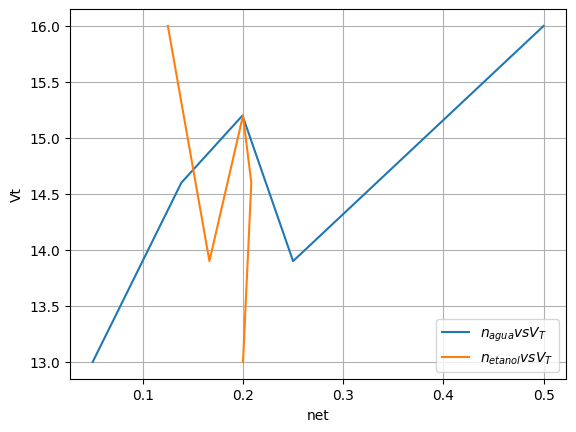

In [25]:
# Datos de ejemplo
nw = np.array([0.5, 0.25, 0.1995, 0.1385, 0.05])  # Moles de etanol
net = np.array([0.125,.1665,.2,.2083,.2])
Vt = np.array([16, 13.9, 15.2, 14.6, 13]) # Volumen total

import matplotlib.pyplot as plt
plt.plot(nw, Vt, label='$n_{agua} vs  V_T$')
plt.plot(net, Vt, label='$n_{etanol} vs  V_T$')
plt.xlabel('net')
plt.ylabel('Vt')
plt.grid()
plt.legend()
plt.show()

Coeficientes del polinomio ajustado (en términos de potencias de x):
x^0: 15.4692
x^1: -100.2872
x^2: 1248.4837
x^3: -4887.9649
x^4: 5592.7851

El valor interpolado en x = 0.35 es aproximadamente 7.6632


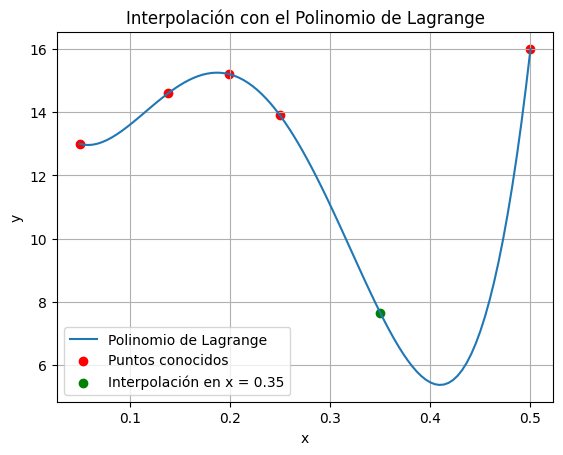

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Función para calcular el polinomio de Lagrange y devolver los coeficientes
def coeficientes_polinomio_lagrange(x_data, y_data):
    n = len(x_data)
    polinomio_final = Polynomial([0])  # Inicializamos con el polinomio cero

    # Calcular cada término del polinomio de Lagrange
    for i in range(n):
        termino = Polynomial([y_data[i]])  # Polinomio con término independiente y_data[i]
        for j in range(n):
            if i != j:
                # Cada factor (x - x_data[j]) / (x_data[i] - x_data[j]) se convierte en un polinomio
                factor = Polynomial([-x_data[j], 1]) / (x_data[i] - x_data[j])
                termino *= factor
        polinomio_final += termino  # Sumar cada término al polinomio final

    return polinomio_final.coef  # Devuelve los coeficientes del polinomio

# Función para calcular el polinomio de Lagrange en un punto dado usando los coeficientes
def evaluar_polinomio(coeficientes, x):
    n = len(coeficientes)
    resultado = sum(coeficientes[i] * x**i for i in range(n))
    return resultado

# Datos de ejemplo
x_data = nw # moles de agua
y_data = Vt # Volumen total

# Calcular coeficientes del polinomio de Lagrange
coeficientes = coeficientes_polinomio_lagrange(x_data, y_data)
print("Coeficientes del polinomio ajustado (en términos de potencias de x):")
for i, coef in enumerate(coeficientes):
    print(f"x^{i}: {coef:.4f}")

# Punto a interpolar
x_interpolar = .35
y_interpolado = evaluar_polinomio(coeficientes, x_interpolar)
print(f"\nEl valor interpolado en x = {x_interpolar} es aproximadamente {y_interpolado:.4f}")

# Graficar el polinomio y los puntos conocidos (opcional)
x_range = np.linspace(min(x_data), max(x_data), 100)
y_range = [evaluar_polinomio(coeficientes, xi) for xi in x_range]

plt.plot(x_range, y_range, label="Polinomio de Lagrange")
plt.scatter(x_data, y_data, color="red", label="Puntos conocidos")
plt.scatter(x_interpolar, y_interpolado, color="green", label=f"Interpolación en x = {x_interpolar}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con el Polinomio de Lagrange")
plt.legend()
plt.grid()
plt.show()


In [9]:
# Volúmenes Molares Parciales

import sympy as sp
na = sp.symbols('n_A')

Vaj = 15.4692 -100.2872 * na + 1248.4837 * na**2 - 4887.9649 * na**3 + 5592.7851 * na**4
print("Polinomio interpolado: V =")
display(Vaj)

Polinomio interpolado: V =


5592.7851*n_A**4 - 4887.9649*n_A**3 + 1248.4837*n_A**2 - 100.2872*n_A + 15.4692

In [14]:
# Derivada: Volumen Molar Parcial agua

Vmpa = Vaj.diff(na)
print("Volumen Molar Parcial para el Agua' =")
display(Vmpa)

Volumen Molar Parcial para el Agua' =


22371.1404*n_A**3 - 14663.8947*n_A**2 + 2496.9674*n_A - 100.2872

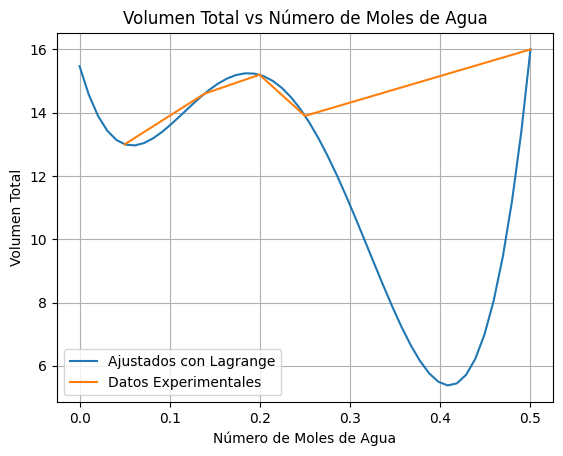

In [28]:
# Gráfico del Volumen Molar Parcial
import numpy as np
NA = np.linspace(start=0, stop=0.5, num=50)

Vmpac = []
Vtcalc = []
for i in NA:
    Vtcalc.append(Vaj.subs(na, i))
    Vmpac.append(Vmpa.subs(na, i))

plt.plot(NA, Vtcalc, label='Ajustados con Lagrange')
plt.plot(nw, Vt, label='Datos Experimentales')
plt.xlabel('Número de Moles de Agua')
plt.ylabel('Volumen Total')
plt.title('Volumen Total vs Número de Moles de Agua')
plt.legend()
plt.grid()
plt.show()

# Dan Volúmenes Molares Parciales Negativos, el ajuste no es bueno

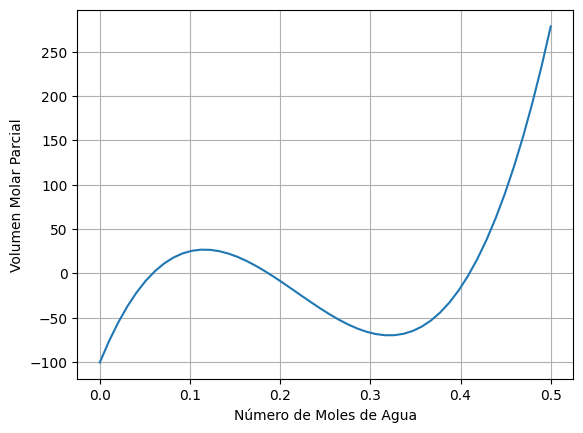

In [48]:
# Volumen Molar Parcial

plt.plot(NA, Vmpac, label='Volumen Molar Parcial')
plt.xlabel('Número de Moles de Agua')
plt.ylabel('Volumen Molar Parcial')
plt.grid()
plt.show()

# Dan Volúmenes Molares Parciales Negativos, el ajuste no es bueno

# Opción 2: Ajustar a polinomio grado 3

Coeficientes del polinomio: [-27.85329308  21.9085941   12.00524545]
Ecuación del polinomio: V = -27.8533 * n_agua^2 + 21.9086 * n_agua + 12.0052


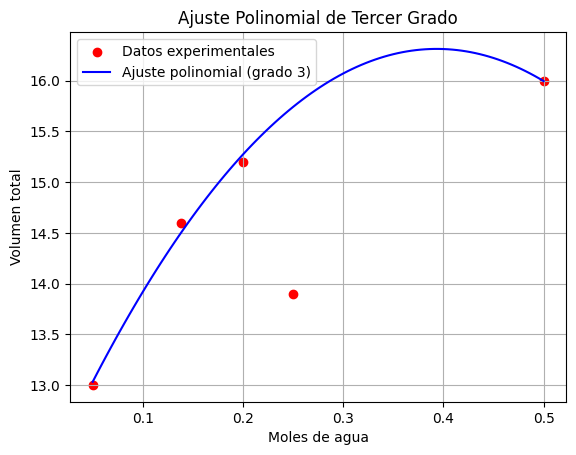

In [60]:
# Estudiando un ajuste a polinomio orden 2:

import numpy as np
import matplotlib.pyplot as plt

# Datos experimentales, descartando el punto de 0.25

nwd = np.array([0.5, 0.1995, 0.1385, 0.05])
Vtd = np.array([16, 15.2, 14.6, 13]) # Volumen total

# Ajuste a un polinomio de segundo grado (grado 2)
coeficientes = np.polyfit(nwd, Vtd, 2)

# Generar la función polinomial usando los coeficientes
polinomio = np.poly1d(coeficientes)

# Valores predichos por el polinomio para graficar el ajuste
n_agua_fit = np.linspace(min(n_agua), max(n_agua), 100)
volumen_fit = polinomio(n_agua_fit)

# Imprimir los coeficientes del polinomio
print("Coeficientes del polinomio:", coeficientes)
print(f"Ecuación del polinomio: V = {coeficientes[0]:.4f} * n_agua^2 + {coeficientes[1]:.4f} * n_agua + {coeficientes[2]:.4f}")

# Graficar los datos experimentales y el ajuste polinomial
plt.scatter(n_agua, volumen, label="Datos experimentales", color="red")
plt.plot(n_agua_fit, volumen_fit, label="Ajuste polinomial (grado 3)", color="blue")
plt.xlabel("Moles de agua")
plt.ylabel("Volumen total")
plt.legend()
plt.grid()
plt.title("Ajuste Polinomial de Tercer Grado")
plt.show()


In [62]:
Vt2 = -27.8533 * na**2 + 21.9086 * na + 12.0052
display(Vt2)

-27.8533*n_A**2 + 21.9086*n_A + 12.0052

In [64]:
# Derivada: Volumen Molar Parcial agua

Vmpa2 = Vt2.diff(na)
print("Volumen Molar Parcial para el Agua' =")
display(Vmpa2)

Volumen Molar Parcial para el Agua' =


21.9086 - 55.7066*n_A

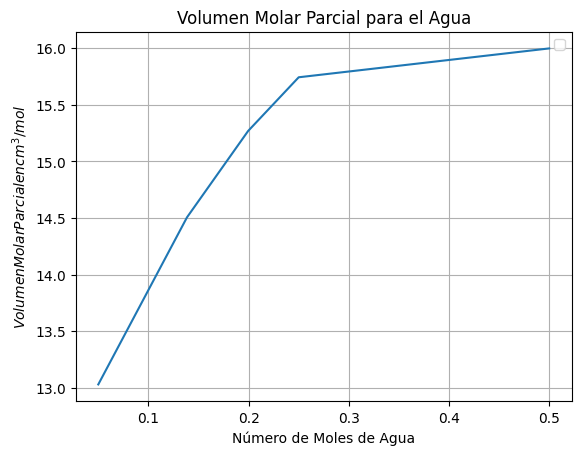

In [70]:
na2 = np.array([0.5, 0.25, 0.1995, 0.1385, 0.05])

Vmpac2 = []
for i in na2:
    Vmpac2.append(Vt2.subs(na, i))


plt.plot(na2, Vmpac2)
plt.xlabel('Número de Moles de Agua')
plt.ylabel('$Volumen Molar Parcial en cm^3/mol$')
plt.title('Volumen Molar Parcial para el Agua')
plt.legend(loc='best')
plt.grid()
plt.show()

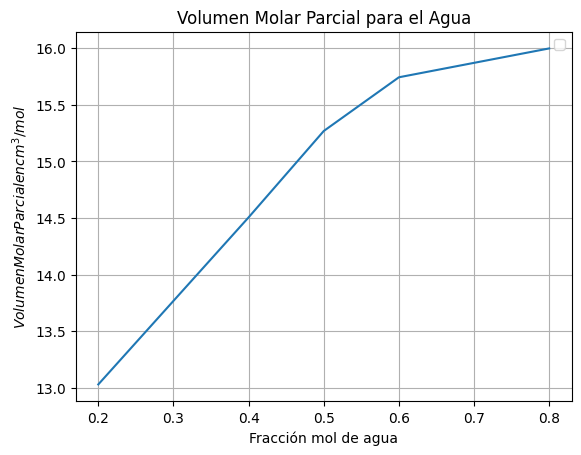

In [76]:
# Fracciones molares de agua

xw = [0.8, 0.6, 0.5, 0.4, 0.2]


plt.plot(xw, Vmpac2)
plt.xlabel('Fracción mol de agua')
plt.ylabel('$Volumen Molar Parcial en cm^3/mol$')
plt.title('Volumen Molar Parcial para el Agua')
plt.legend(loc='best')
plt.grid()
plt.show()
